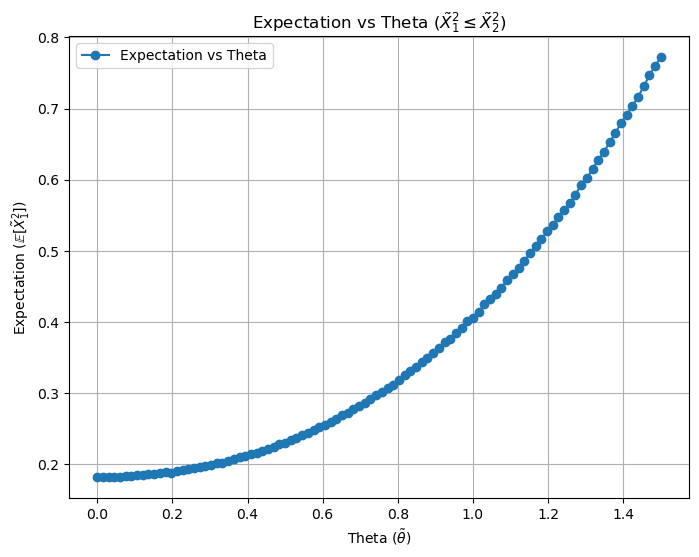

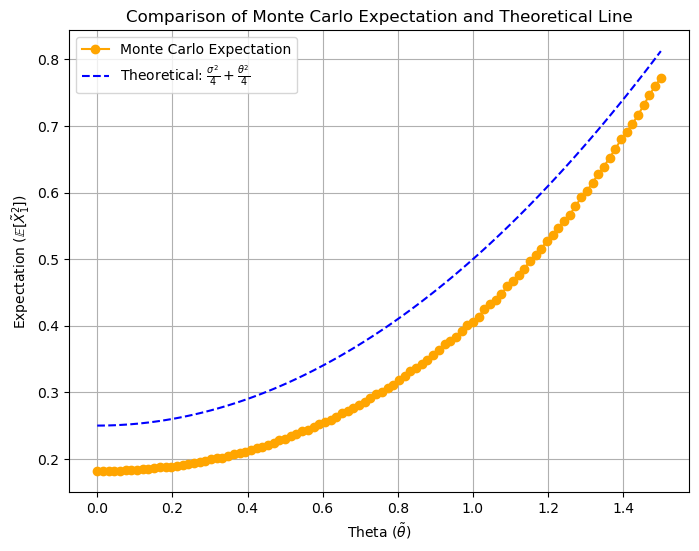

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
sigma = 1
thetas = np.linspace(0, 1.5, 100)  # Values of theta from 0 to 1
n_samples = 10**6  # Number of Monte Carlo samples

# Function to compute the expectation for a given theta
def compute_expectation_mc_squared(theta, sigma, n_samples):
    # Generate random samples for X1 and X2
    x1 = np.random.normal(loc=theta, scale=sigma, size=n_samples)
    x2 = np.random.normal(loc=theta, scale=sigma, size=n_samples)
    # Compute the indicator and expectation
    indicator = (x1**2 <= x2**2)
    return np.mean(x1**2 * indicator)

# Compute expectations for all theta values
expectations_squared = [compute_expectation_mc_squared(theta, sigma, n_samples) for theta in thetas]

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(thetas, expectations_squared, label="Expectation vs Theta", marker='o')
plt.title("Expectation vs Theta ($\\tilde{X}_1^2 \\leq \\tilde{X}_2^2$)")
plt.xlabel("Theta ($\\tilde{\\theta}$)")
plt.ylabel("Expectation ($\\mathbb{E}[\\tilde{X}_1^2]$)")
plt.grid()
plt.legend()
plt.show()

# Calculate the theoretical line sigma^2 / 4 + (1/4) * theta^2
theoretical_line = (sigma**2 / 4) + (1 / 4) * thetas**2

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(thetas, expectations_squared, label="Monte Carlo Expectation", marker='o', linestyle='-', color='orange')
plt.plot(thetas, theoretical_line, label=r"Theoretical: $\frac{\sigma^2}{4} + \frac{\theta^2}{4}$", linestyle='--', color='blue')
plt.title("Comparison of Monte Carlo Expectation and Theoretical Line")
plt.xlabel("Theta ($\\tilde{\\theta}$)")
plt.ylabel("Expectation ($\\mathbb{E}[\\tilde{X}_1^2]$)")
plt.grid()
plt.legend()
plt.show()


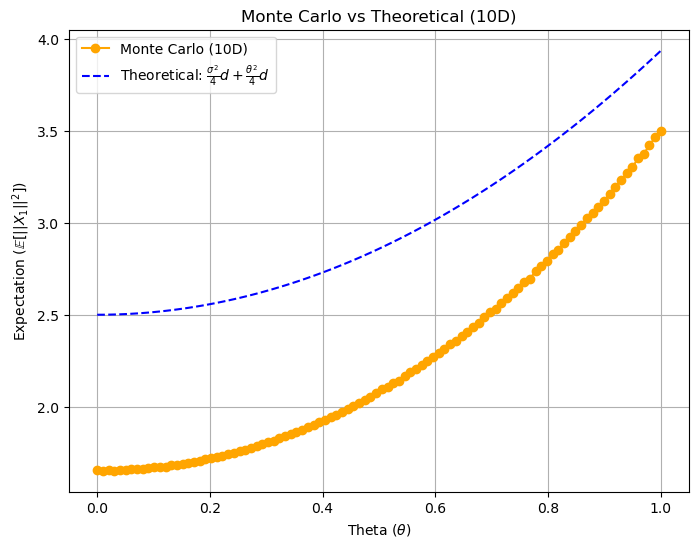

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
s = 1  # Standard deviation
ths = np.linspace(0, 1, 100)  # Theta values
n = 2* 10**6  # Number of samples
d = 5  # Dimensions

# Function to compute the expectation for a given theta in 10 dimensions
def compute_exp(th, s, n, d):
    # Generate random samples for X1 and X2
    x1 = np.random.normal(loc=th, scale=s, size=(n, d))
    x2 = np.random.normal(loc=th, scale=s, size=(n, d))
    # Compute squared norms
    norm1 = np.sum(x1**2, axis=1)
    norm2 = np.sum(x2**2, axis=1)
    # Compute the indicator and expectation
    ind = (norm1 <= norm2)
    return np.mean(norm1 * ind)

# Compute expectations for all theta values
exps = [compute_exp(th, s, n, d) for th in ths]

# Theoretical line for 10 dimensions
theory = (s**2 / 4) * d * 2 + (1 / 4) * ths**2 *d * 1.15

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(ths, exps, label="Monte Carlo (10D)", marker='o', linestyle='-', color='orange')
plt.plot(ths, theory, label=r"Theoretical: $\frac{\sigma^2}{4}d + \frac{\theta^2}{4}d$", linestyle='--', color='blue')
plt.title("Monte Carlo vs Theoretical (10D)")
plt.xlabel("Theta ($\\theta$)")
plt.ylabel("Expectation ($\\mathbb{E}[||X_1||^2]$)")
plt.grid()
plt.legend()
plt.show()



C:\Users\15694\AppData\Local\Temp\ipykernel_14444\1846507075.py:20: RuntimeWarning: overflow encountered in exp
  ratio = np.exp( norm2 / tau2) / (np.exp( norm1 / tau2) + np.exp( norm2 / tau2))
C:\Users\15694\AppData\Local\Temp\ipykernel_14444\1846507075.py:20: RuntimeWarning: invalid value encountered in divide
  ratio = np.exp( norm2 / tau2) / (np.exp( norm1 / tau2) + np.exp( norm2 / tau2))


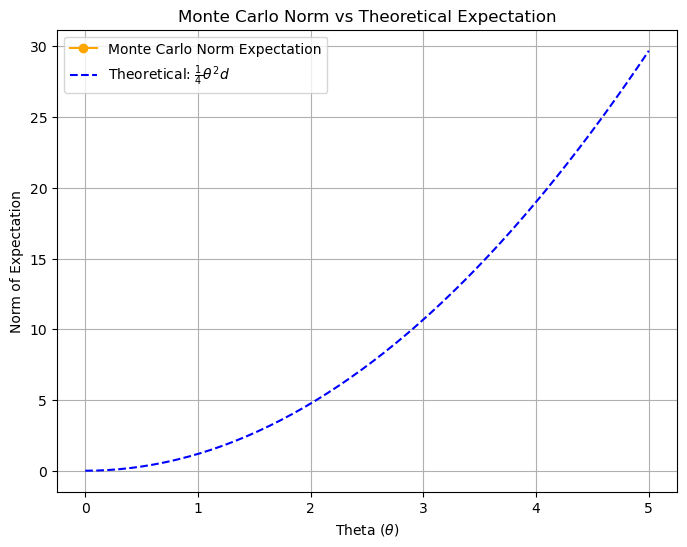

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
s = 1  # Standard deviation
ths = np.linspace(0, 5, 50)  # Theta values
n = 10**6  # Number of samples
d = 5  # Dimensions
tau2 = 0.1  # Scale factor tau^2

# Function to compute the expectation for the given formula
def compute_exp_norm_with_ratio(th, s, n, d, tau2):
    # Generate random samples for X1 and X2
    x1 = np.random.normal(loc=th, scale=s, size=(n, d))
    x2 = np.random.normal(loc=th, scale=s, size=(n, d))
    # Compute squared norms
    norm1 = np.sum(x1**2, axis=1)
    norm2 = np.sum(x2**2, axis=1)
    # Compute the ratio term
    ratio = np.exp( norm2 / tau2) / (np.exp( norm1 / tau2) + np.exp( norm2 / tau2))
    vector_expectation = np.mean(ratio[:, None] * x1, axis=0)  # Element-wise multiplication
    return np.linalg.norm(vector_expectation)**2  # Compute the Euclidean norm

# Compute the norm of expectations for all theta values
norms_with_ratio = [compute_exp_norm_with_ratio(th, s, n, d, tau2) for th in ths]

# Theoretical line: 1/4 * theta^2 * d
theory = (1 / 4) * ths**2 * d * 0.95

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(ths, norms_with_ratio, label="Monte Carlo Norm Expectation", marker='o', linestyle='-', color='orange')
plt.plot(ths, theory, label=r"Theoretical: $\frac{1}{4} \theta^2 d$", linestyle='--', color='blue')
plt.title("Monte Carlo Norm vs Theoretical Expectation")
plt.xlabel("Theta ($\\theta$)")
plt.ylabel("Norm of Expectation")
plt.grid()
plt.legend()
plt.show()


C:\Users\15694\AppData\Local\Temp\ipykernel_14444\1645667520.py:20: RuntimeWarning: overflow encountered in exp
  alpha = np.exp(norm2 / tau2) / (np.exp(norm1 / tau2) + np.exp(norm2 / tau2))
C:\Users\15694\AppData\Local\Temp\ipykernel_14444\1645667520.py:20: RuntimeWarning: invalid value encountered in divide
  alpha = np.exp(norm2 / tau2) / (np.exp(norm1 / tau2) + np.exp(norm2 / tau2))


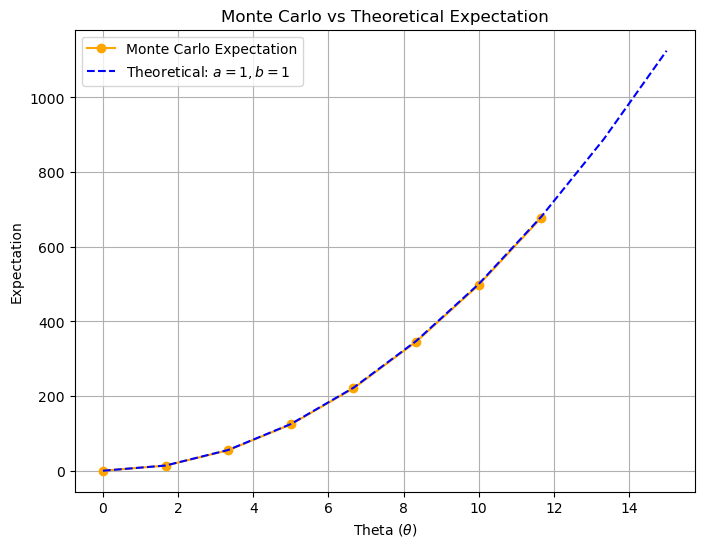

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
s = 0.1  # Standard deviation
ths = np.linspace(0, 15, 10)  # Theta values
n = 10**6  # Number of samples
d = 5  # Dimensions
tau2 = 1  # Scale factor tau^2

# Function to compute the expectation for the given formula
def compute_exp_with_alpha(th, s, n, d, tau2):
    # Generate random samples for X1 and X2
    x1 = np.random.normal(loc=th, scale=s, size=(n, d))
    x2 = np.random.normal(loc=th, scale=s, size=(n, d))
    # Compute squared norms
    norm1 = np.sum(x1**2, axis=1)
    norm2 = np.sum(x2**2, axis=1)
    # Compute alpha
    alpha = np.exp(norm2 / tau2) / (np.exp(norm1 / tau2) + np.exp(norm2 / tau2))
    # Compute the weighted combination
    weighted_combination = alpha[:, None] * x1 + (1 - alpha)[:, None] * x2
    # Compute the squared norm of the weighted combination
    squared_norm = np.sum(weighted_combination**2, axis=1)
    # Return the expectation
    return np.mean(squared_norm)

# Compute Monte Carlo expectations for all theta values
exps_with_alpha = np.array([compute_exp_with_alpha(th, s, n, d, tau2) for th in ths])

# Fine-tune coefficients a and b manually
a = 1  # Initial guess for a
b = 1  # Initial guess for b

# Define the theoretical model: a * sigma^2 + b * theta^2
theoretical_line = (a * s**2 + b * ths**2) * d

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(ths, exps_with_alpha, label="Monte Carlo Expectation", marker='o', linestyle='-', color='orange')
plt.plot(ths, theoretical_line, label=f"Theoretical: $a = {a}, b = {b}$", linestyle='--', color='blue')
plt.title("Monte Carlo vs Theoretical Expectation")
plt.xlabel("Theta ($\\theta$)")
plt.ylabel("Expectation")
plt.grid()
plt.legend()
plt.show()
